In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
## Defining batch specfications
batch_size = 100
img_height = 50
img_width = 50

In [ ]:
!gdown --id 1INRO741DUQ9SLfBfPqQr-yBo7SqYD25W
!unzip archive\ \(4\).zip

In [5]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 70295 files belonging to 38 classes.


In [6]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 17572 files belonging to 38 classes.


In [7]:
class_names = training_ds.class_names

In [8]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

In [9]:
MyCnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
## lets train our CNN
retVal = MyCnn.fit(training_ds,validation_data= validation_ds,epochs = 2)

Epoch 1/2
703/703 [==============================] - 328s 464ms/step - loss: 1.1070 - accuracy: 0.6724 - val_loss: 0.5341 - val_accuracy: 0.8337
Epoch 2/2
703/703 [==============================] - 298s 423ms/step - loss: 0.4151 - accuracy: 0.8689 - val_loss: 0.3975 - val_accuracy: 0.8722


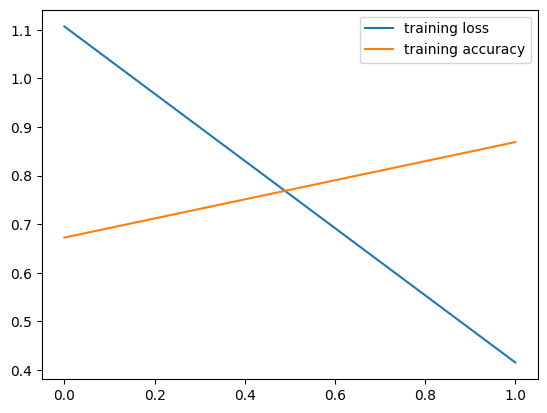

In [11]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

4/4 [==============================] - 0s 22ms/step


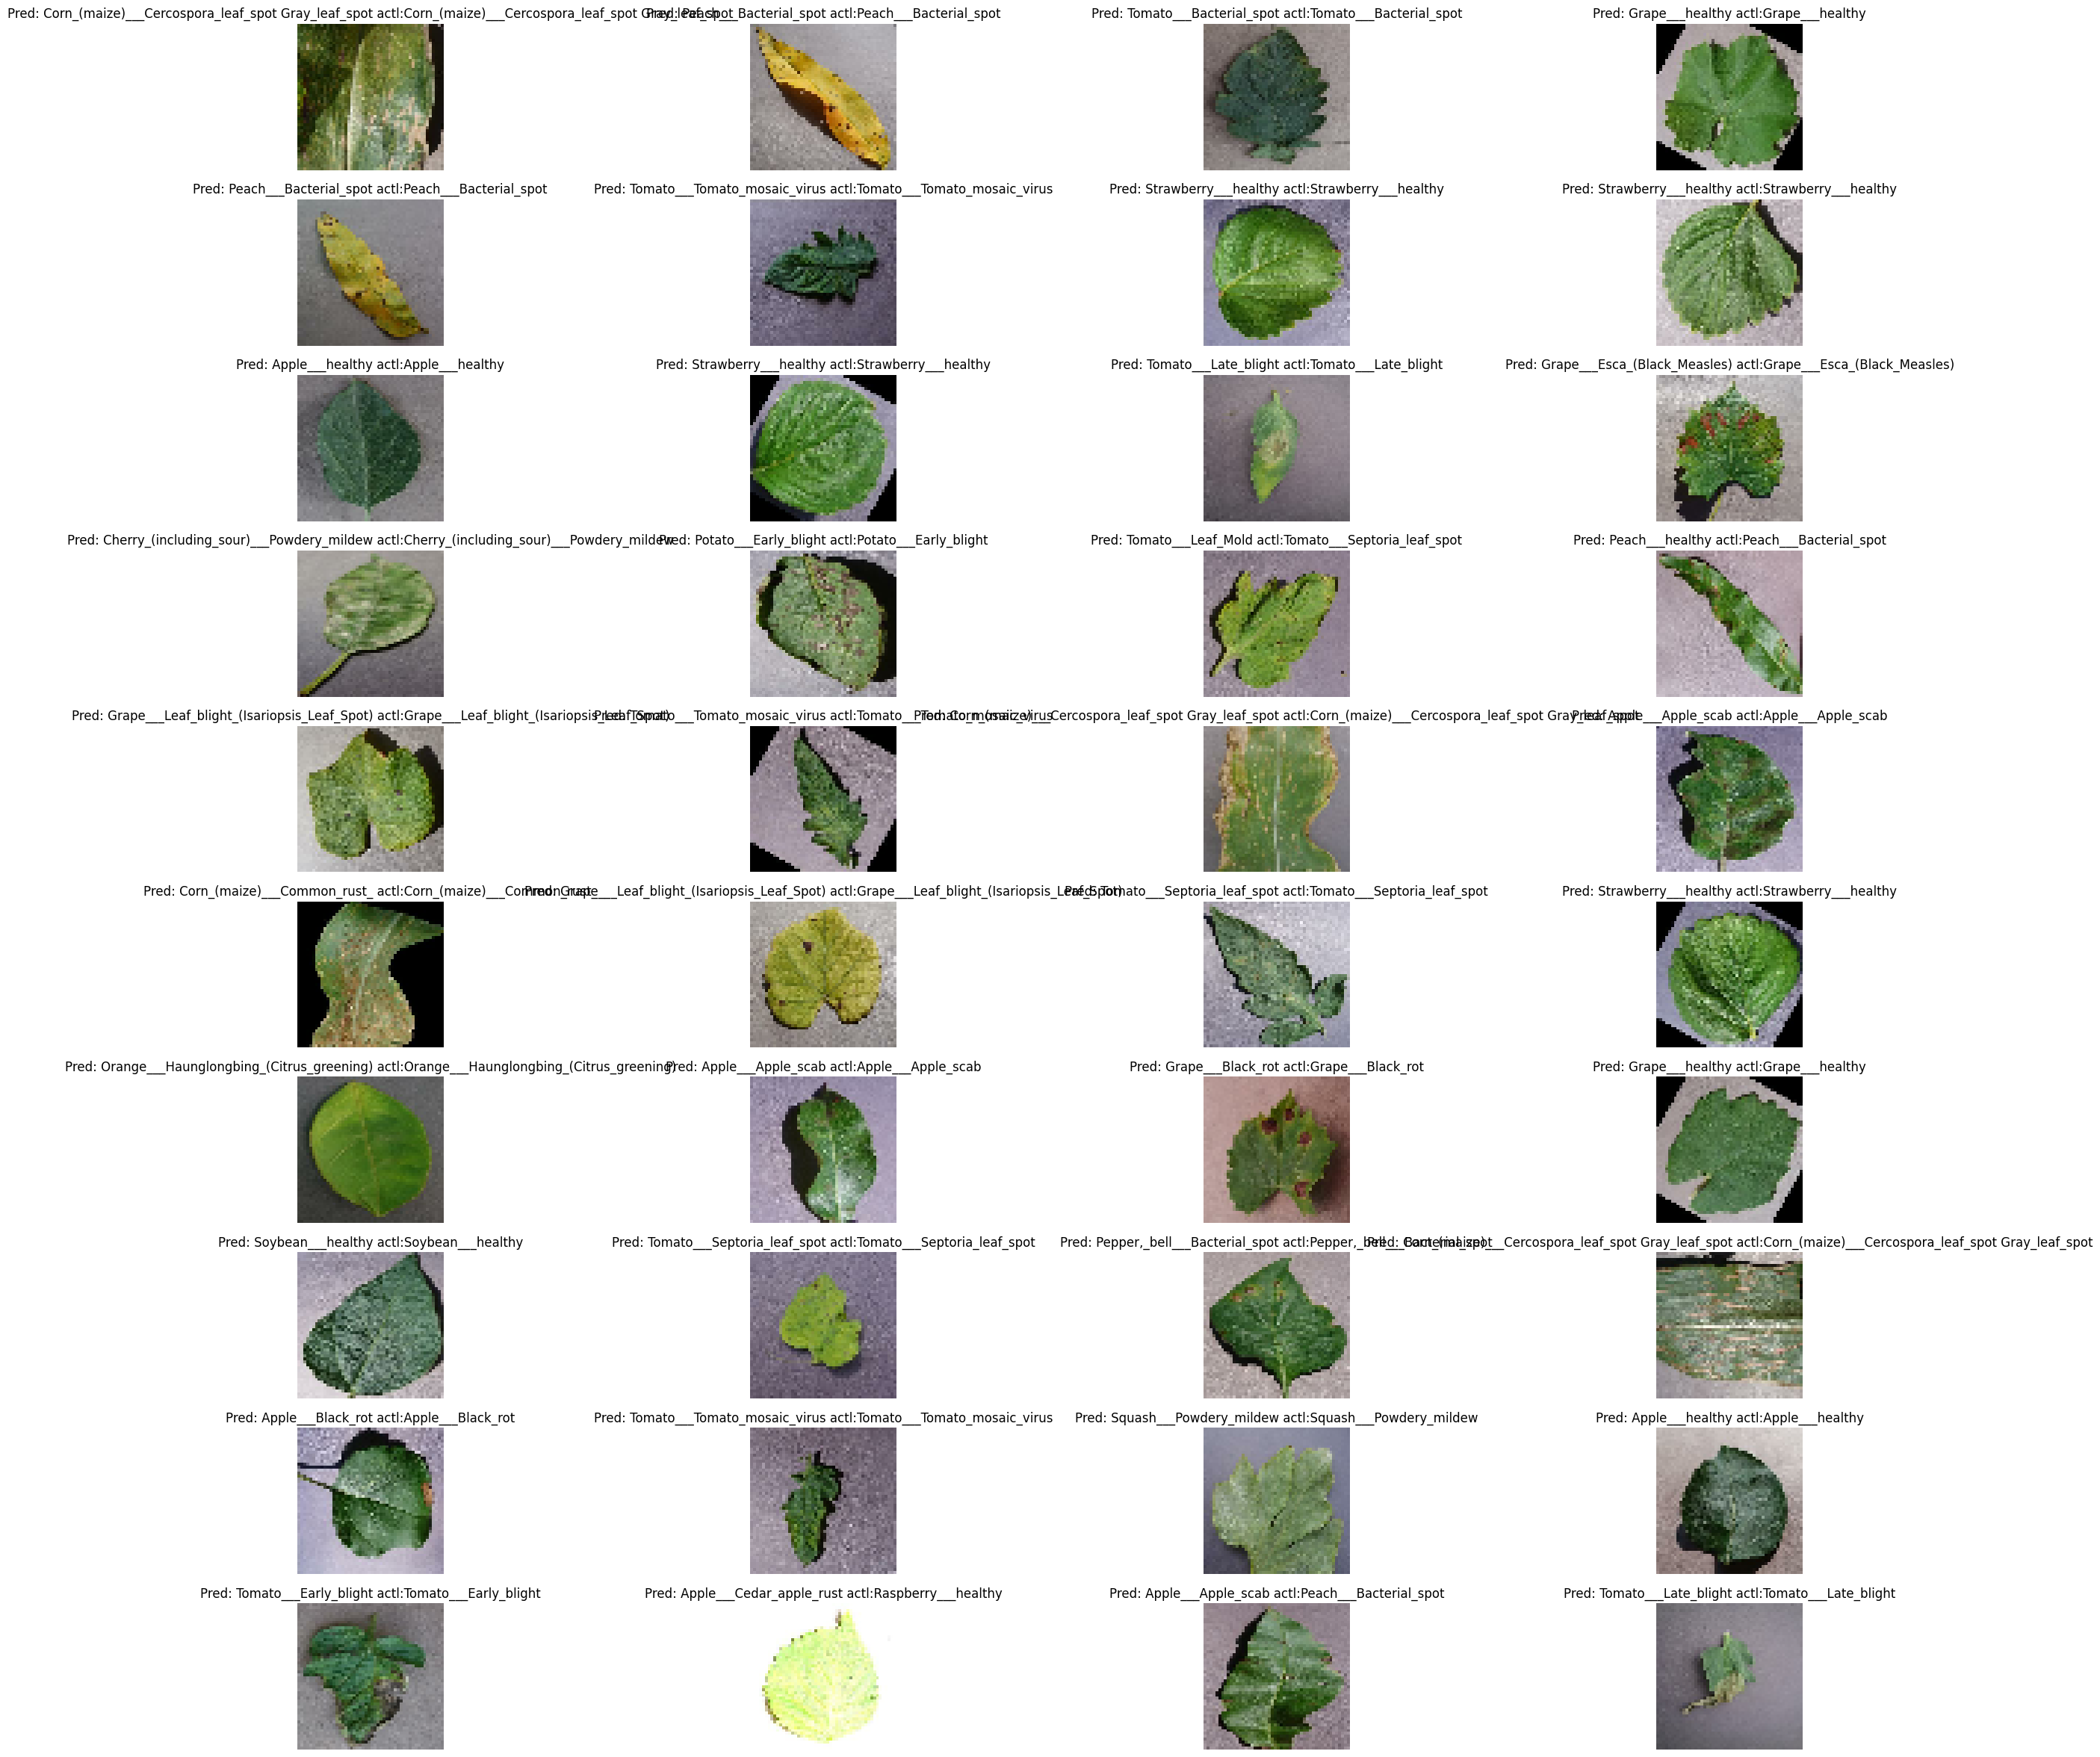

In [12]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

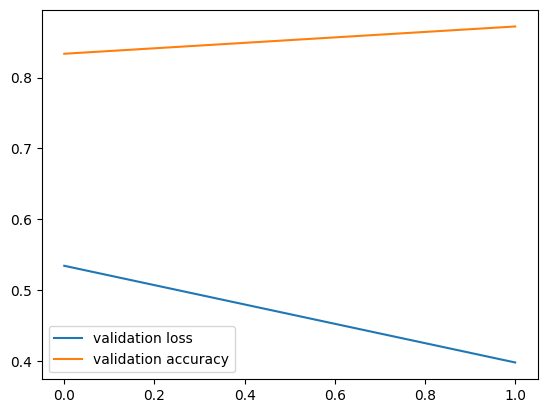

In [13]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()